In [1]:
import pandas as pd
import os

In [11]:
df_list = []
for vo in os.listdir('dataset/cmcc'):
    df_list.append(pd.read_csv('dataset/cmcc/' + vo, sep='\t'))

In [21]:
for i in range(3):
    vo = df_list[i]
    vo = vo.T.reset_index().T.reset_index(drop=True)
    vo.columns = ['level','text']
    df_list[i] = vo

In [45]:
df = pd.merge(df_list[2],df_list[1],how='outer')
df = pd.merge(df_list[0],df,how='outer')

In [2]:
df = pd.read_csv('dataset/cmcc/full.csv')

<AxesSubplot:>

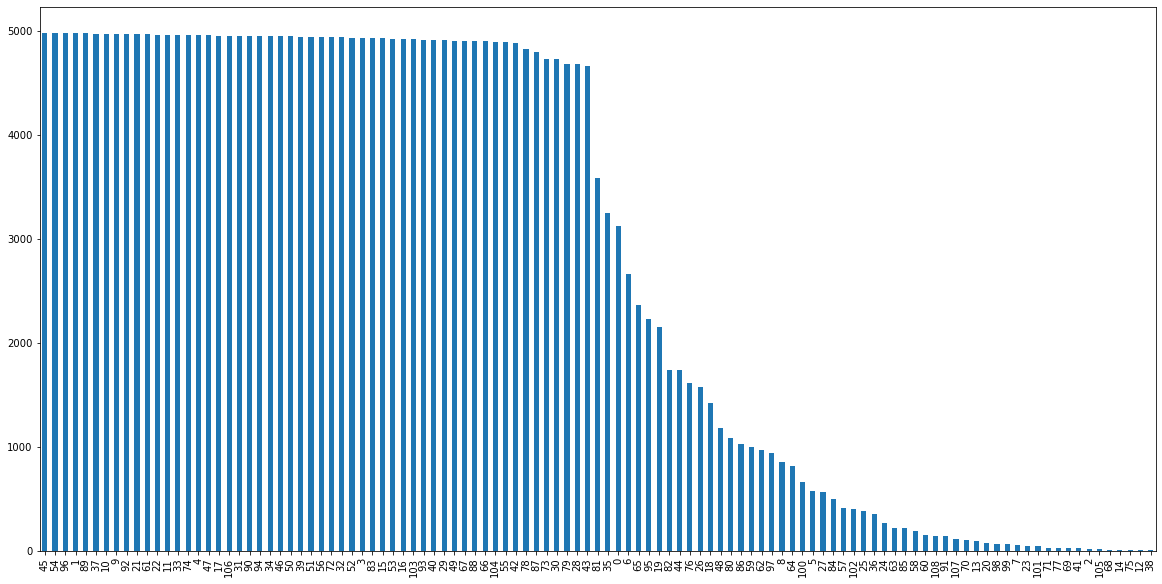

In [4]:
df.level.value_counts().plot(kind='bar',figsize=(20,10))

In [12]:
df.level.value_counts().to_dict()[87]

4799

In [47]:
import rjieba
import re
stopwords = [i.strip() for i in open('dataset/stopwords/cn_stopwords.txt').readlines()]
 
def pretty_cut(sentence):
    cut_list = rjieba.cut(''.join(re.findall('[\u4e00-\u9fa5]', sentence)))
    for i in range(len(cut_list)-1, -1, -1):
        if cut_list[i] in stopwords:
            del cut_list[i]
    return cut_list

In [48]:
df['text'] = df['text'].apply(lambda x: pretty_cut(x))

In [49]:
df['text'] = df['text'].apply(lambda x: ''.join(map(str, x)))

In [56]:
df.head(10)

,level,text
0,50,驰越公司提出诉讼请求要求立即支付塔吊租赁费元年月日起以元基数每天千分之五支付违约金塔吊租赁费...
1,79,原告诉称月入职年月日拖欠数月工资全面停产单方面解除劳动合同经济补偿金未发放认为原因单方面解除...
2,51,反诉黄云祥谢桂华谢海华诉称三协议合伙兴建废品加工厂考察拟将厂址设在下七乡杨坑村沿河高坡窝口坪...
3,81,本案相关情况查明徐安英光彦公司工作未参加社会保险徐安英光彦公司邮寄辞职信以光彦公司未办理社会...
4,50,反诉提出诉讼请求请求人民法院判决立即支付租金元依法解除双方签订石坝村发展壮大村集体经济项目租...
5,81,原审法院查明年月日光彦公司登记成立高美娥光彦公司从事机工工作光彦公司未为高美娥办理社会保险年...
6,43,案件事实借款合同约定情况合同名称易分期业务贷款合同出借人为借款人借款金额元签约日期年月日借款...
7,37,张进莺申请再审称请求依法撤销京民初号民事判决书改判令杜文华返还位于北京市延庆区村东临黄国英南...
8,59,富侨重庆控股有限公司诉称第号富侨图商标第号富侨商标权利公司成立一直从事足疗保健行业国家商标局...
9,62,上海机械科技有限公司提出诉讼请求停止使用牌高频破碎锤书面道歉事实理由上海上鸣机械科技有限公司...


In [57]:
df.to_csv('dataset/cmcc/full.csv',index=False)

In [61]:
train_set = df.sample(frac=0.95)
train_set.to_csv('dataset/cmcc/train.tsv',sep='\t',index=False)

In [62]:
test_set = df.drop(train_set.index)

In [63]:
test_set.to_csv('dataset/cmcc/test.tsv',sep='\t',index=False)

In [64]:
test_set.to_csv('dataset/cmcc/dev.tsv',sep='\t',index=False)